# Rotation

In [18]:
#!{sys.executable} -m pip install scikit-image
from skimage import measure
import cv2
import numpy as np
from matplotlib import pyplot as plt

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


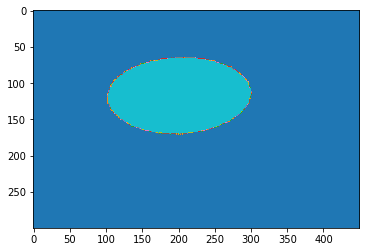

In [14]:
#load labels
with open('labels.npy', 'rb') as f:
        labels = np.load(f)
print(labels)
plt.imshow(labels, cmap='tab10')
plt.show()



In [8]:

# contour = measure.find_contours(labels, 0)
# print(contour)
ellipse = cv2.fitEllipse(labels)
print(ellipse)
#poly = cv2.ellipse2Poly((int(ellipse[0][0]), int(ellipse[0][1])), (int(ellipse[1][0] / 2), int(ellipse[1][1] / 2)), int(ellipse[2]), 0, 360, 5)



error: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\shapedescr.cpp:355: error: (-215:Assertion failed) n >= 0 && (depth == CV_32F || depth == CV_32S) in function 'cv::fitEllipseNoDirect'


In [17]:
# Load image, grayscale, Gaussian blur, Otsu's threshold
image = labels
blur = cv2.GaussianBlur(image, (3,3), 0)
thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

# Dilate with elliptical shaped kernel
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))
dilate = cv2.dilate(thresh, kernel, iterations=2)

# Find contours, filter using contour threshold area, draw ellipse
cnts = cv2.findContours(dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    area = cv2.contourArea(c)
    if area > 5000:
        ellipse = cv2.fitEllipse(c)
        cv2.ellipse(image, ellipse, (36,255,12), 2)

cv2.imshow('thresh', thresh)
cv2.imshow('dilate', dilate)
cv2.imshow('image', image)
cv2.waitKey()

error: OpenCV(4.5.5) D:/a/opencv-python/opencv-python/opencv/modules/imgproc/src/filter.simd.hpp:3045: error: (-213:The function/feature is not implemented) Unsupported combination of source format (=4), and buffer format (=5) in function 'cv::opt_AVX2::getLinearRowFilter'
